In [16]:
%matplotlib inline

In [17]:
print(__doc__)
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy import interp
from scipy import stats
import pandas as pd
import seaborn as sns

Automatically created module for IPython interactive environment


### Load Dataset

In [18]:
df = pd.read_csv('telecom.csv')

### One Hot Encoding

In [19]:
ohe_df=pd.get_dummies(df['Education'], drop_first=True)
df = pd.concat([df, ohe_df], axis=1).drop(['Education'], axis=1)

In [20]:
corr = df.corr()

<AxesSubplot:>

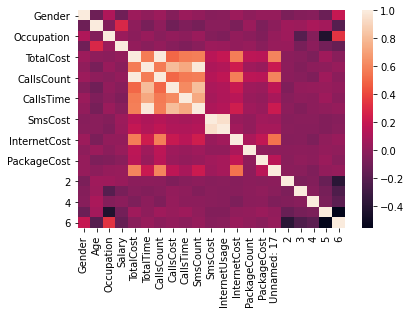

In [21]:
sns.heatmap(corr)

### Outlier Detection

47.0


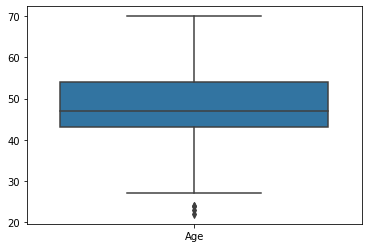

In [22]:
sns.boxplot(data=df[['Age']])
median_ = np.median(df[['Age']])
print (median_)

In [23]:
z = np.abs(stats.zscore(df[['Age']]))
threshold = 3
print(np.where(z > 3))

(array([ 49,  73,  92, 505]), array([0, 0, 0, 0]))


160000000.0


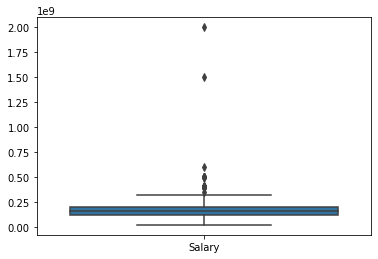

In [24]:
sns.boxplot(data=df[['Salary']])
median_ = np.median(df[['Salary']])
print (median_)

In [25]:
z = np.abs(stats.zscore(df[['Salary']]))
threshold = 3
print(np.where(z > 3))

(array([ 66, 240, 403, 508, 596, 631, 652, 684, 723, 758, 845, 890, 924]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


261878.0


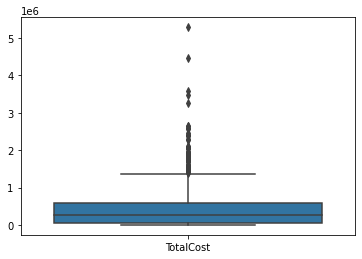

In [26]:
sns.boxplot(data=df[['TotalCost']])
median_ = np.median(df[['TotalCost']])
print (median_)

In [27]:
z = np.abs(stats.zscore(df[['TotalCost']]))
threshold = 3
print(np.where(z > 3))

(array([937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [28]:
print (df.iloc[390]['TotalCost'])
print (df.iloc[391]['TotalCost'])
print (df.iloc[392]['TotalCost'])
print (df.iloc[393]['TotalCost'])

184366
184606
184637
188080


31312.5


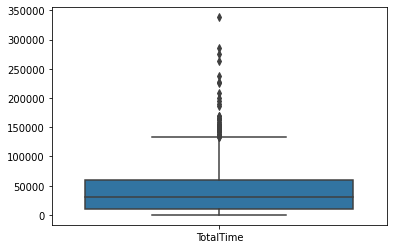

In [29]:
sns.boxplot(data=df[['TotalTime']])
median_ = np.median(df[['TotalTime']])
print (median_)

In [30]:
z = np.abs(stats.zscore(df[['TotalTime']]))
threshold = 3
print(np.where(z > 3))

(array([503, 756, 828, 855, 863, 893, 916, 922, 941, 944, 947, 953]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [31]:
print (df.iloc[60]['TotalTime'])
print (df.iloc[133]['TotalTime'])
print (df.iloc[135]['TotalTime'])
print (df.iloc[136]['TotalTime'])
print (df.iloc[474]['TotalTime'])
print (df.iloc[475]['TotalTime'])
print (df.iloc[476]['TotalTime'])
print (df.iloc[479]['TotalTime'])
print (df.iloc[480]['TotalTime'])
print (df.iloc[481]['TotalTime'])
print (df.iloc[482]['TotalTime'])
print (df.iloc[606]['TotalTime'])

0
0
77
14474
88301
37639
45026
54773
41530
60783
51943
48516


283966.0


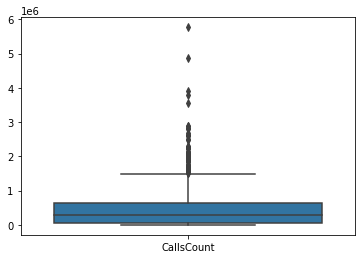

In [32]:
sns.boxplot(data=df[['CallsCount']])
median_ = np.median(df[['CallsCount']])
print (median_)

In [33]:
z = np.abs(stats.zscore(df[['CallsCount']]))
threshold = 3
print(np.where(z > 3))

(array([937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [34]:
print (df.iloc[0]['CallsCount'])
print (df.iloc[53]['CallsCount'])
print (df.iloc[113]['CallsCount'])
print (df.iloc[324]['CallsCount'])
print (df.iloc[325]['CallsCount'])
print (df.iloc[372]['CallsCount'])
print (df.iloc[377]['CallsCount'])
print (df.iloc[389]['CallsCount'])
print (df.iloc[399]['CallsCount'])
print (df.iloc[654]['CallsCount'])
print (df.iloc[714]['CallsCount'])

0
0
6867
143937
144414
186315
188622
200425
211809
518571
639725


309.5


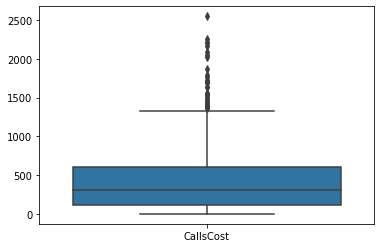

In [35]:
sns.boxplot(data=df[['CallsCost']])
median_ = np.median(df[['CallsCost']])
print (median_)

In [36]:
z = np.abs(stats.zscore(df[['CallsCost']]))
threshold = 3
print(np.where(z > 3))

(array([ 69, 378, 667, 814, 818, 827, 828, 856, 863, 873, 893, 908, 913,
       916, 922, 941, 953]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [37]:
print (df.iloc[24]['CallsCost'])
print (df.iloc[42]['CallsCost'])
print (df.iloc[99]['CallsCost'])
print (df.iloc[131]['CallsCost'])
print (df.iloc[376]['CallsCost'])
print (df.iloc[428]['CallsCost'])
print (df.iloc[488]['CallsCost'])
print (df.iloc[509]['CallsCost'])
print (df.iloc[575]['CallsCost'])
print (df.iloc[672]['CallsCost'])
print (df.iloc[673]['CallsCost'])
print (df.iloc[726]['CallsCost'])

0
0
0
0
316
57
466
348
156
654
1140
1149


114435.0


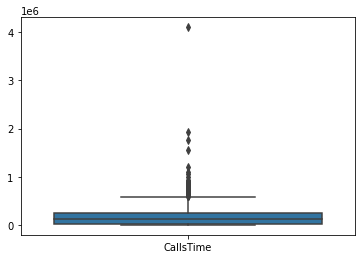

In [38]:
sns.boxplot(data=df[['CallsTime']])
median_ = np.median(df[['CallsTime']])
print (median_)

In [39]:
z = np.abs(stats.zscore(df[['CallsTime']]))
threshold = 3
print(np.where(z > 3))

(array([841, 850, 882, 887, 911, 922, 928, 947, 953]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [40]:
print (df.iloc[51]['CallsTime'])
print (df.iloc[52]['CallsTime'])
print (df.iloc[53]['CallsTime'])
print (df.iloc[75]['CallsTime'])
print (df.iloc[76]['CallsTime'])
print (df.iloc[77]['CallsTime'])
print (df.iloc[560]['CallsTime'])
print (df.iloc[561]['CallsTime'])
print (df.iloc[562]['CallsTime'])
print (df.iloc[563]['CallsTime'])
print (df.iloc[599]['CallsTime'])

0
0
0
0
0
0
334061
338016
61415
39513
11560


31260.5


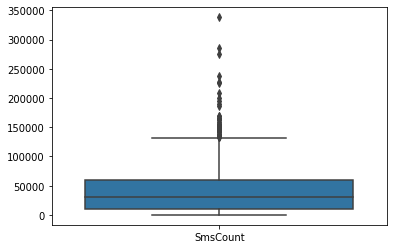

In [41]:
sns.boxplot(data=df[['SmsCount']])
median_ = np.median(df[['SmsCount']])
print (median_)

In [42]:
z = np.abs(stats.zscore(df[['SmsCount']]))
threshold = 3
print(np.where(z > 3))

(array([756, 828, 855, 863, 893, 916, 922, 941, 944, 947, 953]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [43]:
print (df.iloc[53]['SmsCount'])
print (df.iloc[226]['SmsCount'])
print (df.iloc[646]['SmsCount'])
print (df.iloc[647]['SmsCount'])

0
6481
59928
81818


26.0


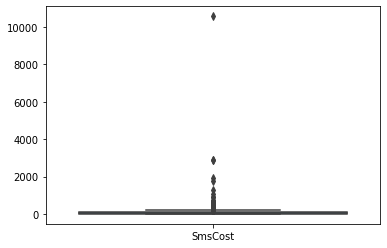

In [44]:
sns.boxplot(data=df[['SmsCost']])
median_ = np.median(df[['SmsCost']])
print (median_)

In [45]:
z = np.abs(stats.zscore(df[['SmsCost']]))
threshold = 3
print(np.where(z > 3))

(array([672, 770, 883, 889, 890, 926]), array([0, 0, 0, 0, 0, 0]))


In [46]:
print (df.iloc[12]['SmsCost'])
print (df.iloc[13]['SmsCost'])
print (df.iloc[15]['SmsCost'])
print (df.iloc[16]['SmsCost'])
print (df.iloc[17]['SmsCost'])
print (df.iloc[29]['SmsCost'])
print (df.iloc[77]['SmsCost'])
print (df.iloc[377]['SmsCost'])

0
0
0
0
0
0
0
1


2707.0


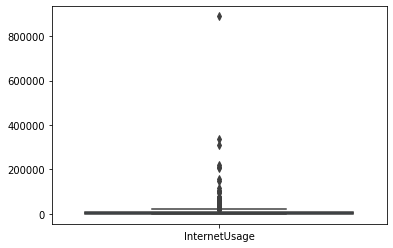

In [47]:
sns.boxplot(data=df[['InternetUsage']])
median_ = np.median(df[['InternetUsage']])
print (median_)

In [48]:
z = np.abs(stats.zscore(df[['InternetUsage']]))
threshold = 3
print(np.where(z > 3))

(array([672, 770, 811, 883, 889, 890, 899, 926]), array([0, 0, 0, 0, 0, 0, 0, 0]))


In [49]:
print (df.iloc[5]['InternetUsage'])
print (df.iloc[30]['InternetUsage'])
print (df.iloc[31]['InternetUsage'])
print (df.iloc[34]['InternetUsage'])
print (df.iloc[35]['InternetUsage'])
print (df.iloc[238]['InternetUsage'])
print (df.iloc[413]['InternetUsage'])
print (df.iloc[469]['InternetUsage'])
print (df.iloc[471]['InternetUsage'])
print (df.iloc[472]['InternetUsage'])
print (df.iloc[646]['InternetUsage'])
print (df.iloc[716]['InternetUsage'])
print (df.iloc[717]['InternetUsage'])
print (df.iloc[718]['InternetUsage'])
print (df.iloc[749]['InternetUsage'])

0
0
0
0
0
0
6277
16098
1157
8947
4692
16250
2017
37352
3202


347840.5


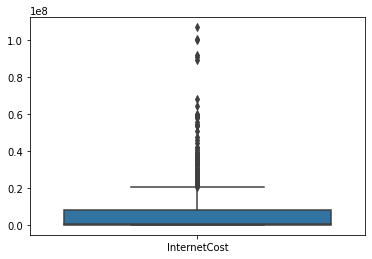

In [50]:
sns.boxplot(data=df[['InternetCost']])
median_ = np.median(df[['InternetCost']])
print (median_)

In [51]:
z = np.abs(stats.zscore(df[['InternetCost']]))
threshold = 3
print(np.where(z > 3))

(array([436, 452, 489, 712, 721, 821, 836, 875, 893, 902, 914, 917, 919,
       925, 929, 930, 936, 937, 940, 944, 949, 952]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [52]:
print (df.iloc[4]['InternetCost'])
print (df.iloc[12]['InternetCost'])
print (df.iloc[16]['InternetCost'])

0
0
0


0.0


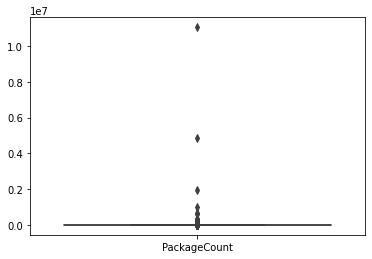

In [53]:
sns.boxplot(data=df[['PackageCount']])
median_ = np.median(df[['PackageCount']])
print (median_)

In [54]:
z = np.abs(stats.zscore(df[['PackageCount']]))
threshold = 3
print(np.where(z > 3))

(array([474, 945, 954]), array([0, 0, 0]))


In [55]:
print (df.iloc[53]['PackageCount'])
print (df.iloc[225]['PackageCount'])
print (df.iloc[250]['PackageCount'])
print (df.iloc[645]['PackageCount'])
print (df.iloc[646]['PackageCount'])

0
0
2
0
0


0.0


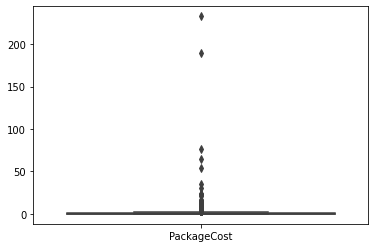

In [56]:
sns.boxplot(data=df[['PackageCost']])
median_ = np.median(df[['PackageCost']])
print (median_)

In [57]:
z = np.abs(stats.zscore(df[['PackageCost']]))
threshold = 3
print(np.where(z > 3))

(array([470, 618, 631, 843, 860, 866]), array([0, 0, 0, 0, 0, 0]))


In [58]:
print (df.iloc[0]['PackageCost'])
print (df.iloc[1]['PackageCost'])
print (df.iloc[2]['PackageCost'])
print (df.iloc[3]['PackageCost'])
print (df.iloc[4]['PackageCost'])
print (df.iloc[5]['PackageCost'])
print (df.iloc[16]['PackageCost'])
print (df.iloc[17]['PackageCost'])
print (df.iloc[28]['PackageCost'])
print (df.iloc[29]['PackageCost'])
print (df.iloc[505]['PackageCost'])

0
1
2
2
0
0
0
0
0
0
1


# Features

### Descriptive Analysis

In [59]:
stats.describe(df['Salary'])

DescribeResult(nobs=956, minmax=(20000000, 2000000000), mean=168880753.13807532, variance=1.1873824508751562e+16, skewness=7.288747501843703, kurtosis=105.8229399848807)

In [60]:
stats.describe(df['TotalCost'])

DescribeResult(nobs=956, minmax=(0, 5290023), mean=430840.41317991633, variance=297148924180.50446, skewness=2.8906863778024374, kurtosis=13.692980326886879)

In [61]:
stats.describe(df['TotalTime'])

DescribeResult(nobs=956, minmax=(0, 338099), mean=42230.780334728035, variance=1881887491.4742098, skewness=1.9259223286991851, kurtosis=5.819913274418905)

In [62]:
stats.describe(df['CallsCount'])

DescribeResult(nobs=956, minmax=(0, 5766090), mean=467641.05857740587, variance=351988573295.3871, skewness=2.9076795022047492, kurtosis=13.823264254987702)

In [63]:
stats.describe(df['CallsCost'])

DescribeResult(nobs=956, minmax=(0, 2550), mean=414.6506276150628, variance=162857.58252316588, skewness=1.5351235673471342, kurtosis=3.082461473993212)

In [64]:
stats.describe(df['CallsTime'])

DescribeResult(nobs=956, minmax=(0, 4105012), mean=183299.23430962343, variance=61550261382.009964, skewness=5.689419677950697, kurtosis=69.96655033928978)

In [65]:
stats.describe(df['SmsCount'])

DescribeResult(nobs=956, minmax=(0, 338099), mean=41912.9330543933, variance=1834445158.8436809, skewness=1.8768972233568295, kurtosis=5.597575914722112)

In [66]:
stats.describe(df['SmsCost'])

DescribeResult(nobs=956, minmax=(0, 10573), mean=84.41213389121339, variance=151419.81530811187, skewness=21.60771902621668, kurtosis=557.1812221014188)

In [67]:
stats.describe(df['InternetUsage'])

DescribeResult(nobs=956, minmax=(0, 889940), mean=9968.95188284519, variance=1377361850.646897, skewness=16.02950633633931, kurtosis=342.7226513106427)

In [68]:
stats.describe(df['InternetCost'])

DescribeResult(nobs=956, minmax=(0, 106871202), mean=6736083.562761506, variance=170295040251214.28, skewness=3.4836438147470146, kurtosis=16.368956314991188)

In [69]:
stats.describe(df['PackageCount'])

DescribeResult(nobs=956, minmax=(0, 11049267), mean=33839.88807531381, variance=159456137212.66495, skewness=23.99318353386373, kurtosis=627.1244119923724)

In [70]:
stats.describe(df['PackageCost'])

DescribeResult(nobs=956, minmax=(0, 233), mean=1.8138075313807531, variance=114.38414423097987, skewness=17.076898646961702, kurtosis=330.87197770443703)

In [71]:
features = ['Gender', 'Age','Occupation',2 ,3,'Salary','TotalCost','TotalTime','CallsCount','CallsCost','CallsTime','SmsCount','SmsCost','InternetUsage','InternetCost','PackageCount','PackageCost']
# Separating out the features
X = df[features].values

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [73]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['nX1', 'nX2','nX3', 'nX4','nx5'])

In [74]:
principalDf

,nX1,nX2,nX3,nX4,nx5
0,-0.211167,-0.220507,-0.097569,-0.284522,-0.037217
1,0.720945,0.107538,-0.013528,-0.230546,-0.160481
2,-0.203787,-0.234591,-0.089937,-0.281308,-0.008865
3,-0.542294,0.707833,0.050412,-0.247129,-0.019109
4,-0.539276,0.700692,0.060087,-0.289981,-0.007323
...,...,...,...,...,...
951,-0.551573,0.723247,-0.072089,0.599125,0.019311
952,-0.224584,-0.181651,-0.216395,0.544343,-0.036147
953,-0.249941,-0.189275,-0.411769,1.810376,0.041969
954,0.723727,0.115972,-0.139464,0.771901,-0.080594


In [77]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans, KMeans

### 1. Elbow Curve Method

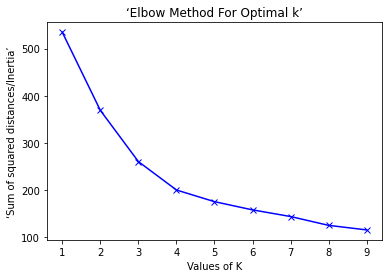

In [78]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('‘Sum of squared distances/Inertia’') 
plt.title('‘Elbow Method For Optimal k’')
plt.show()

### 2. Silhouette analysis

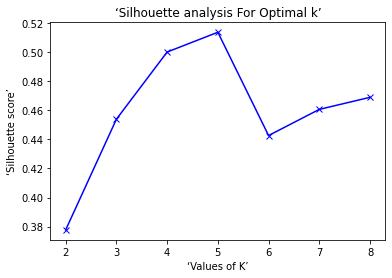

In [79]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('‘Values of K’') 
plt.ylabel('‘Silhouette score’') 
plt.title('‘Silhouette analysis For Optimal k’')
plt.show()

### Affinity Propagation

/opt/jupyterhub/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


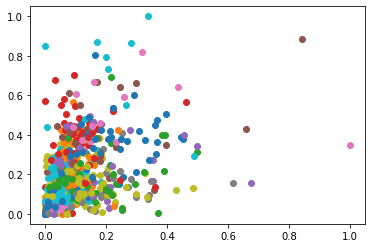

In [80]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### Agglomerative Clustering

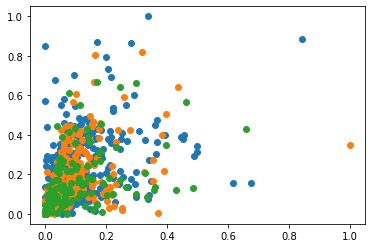

In [81]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### BIRCH

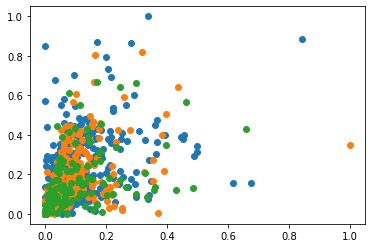

In [82]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### DBSCAN

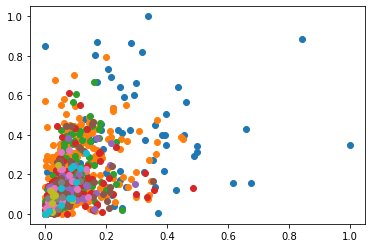

In [83]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### K-Means

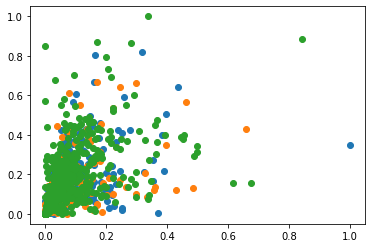

In [84]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### Mini-Batch K-Means

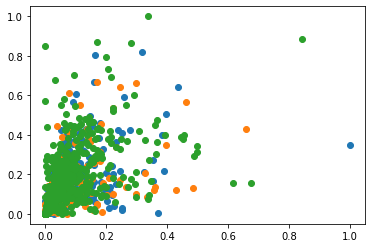

In [85]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define the model
model = MiniBatchKMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### Mean Shift

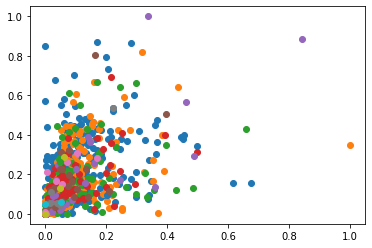

In [86]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### OPTICS

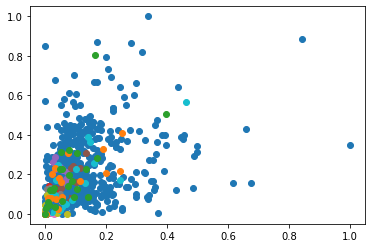

In [87]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### Spectral Clustering

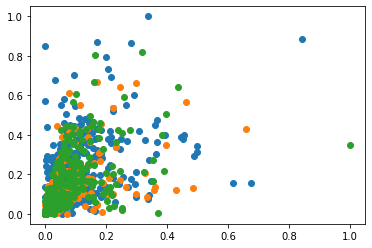

In [88]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot

model = SpectralClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()

### Gaussian Mixture Model

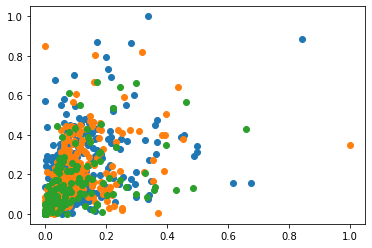

In [89]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 8], X[row_ix, 9])
# show the plot
pyplot.show()